# Understand the dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

Load the file

In [7]:
df = sb.load_dataset("tips") # Load the example tips dataset

In [8]:
# df.head(number of first rows to show)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
# Can see the memory usage, columns type, length and if there are nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB


In [11]:
# More information about the dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Look at the dat frame with pandas_profiling

In [15]:
#!pip install pandas_profiling
import pandas_profiling
pandas_profiling.ProfileReport(df)

Use __pairplot__ to search for a liner regration between the features to the target.<br>
If they have, we can use a linear regration model.<br>
If there is a big linerar relation between two features, we can maybe deltere one of them and without disturbing the model.<br>
The main diagonal shows the values amount of every feature, it helps ussee if we miss data in spesific column.

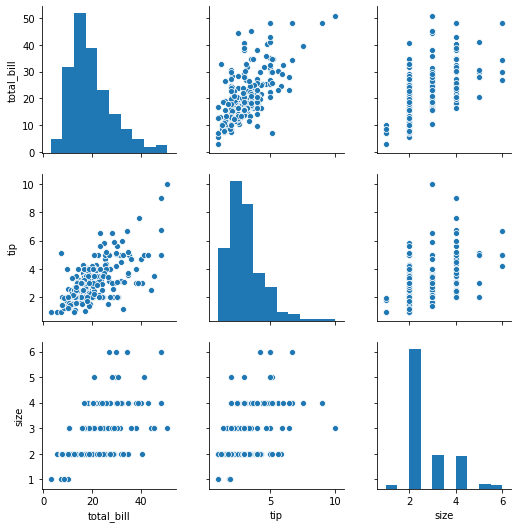

In [20]:
sb.pairplot(df)

Display correlation between the columns in the dataset with heatmap<br>
If the corr value is __negative__, the corr between the two columns is negarive - when X is smaller Y is bigger<br>
If the corr value is __positive__, the corr between the two columns is negarive - when X is bigger Y is smaller<br>
If the corr value is __zero__, there is not corr between the two columns

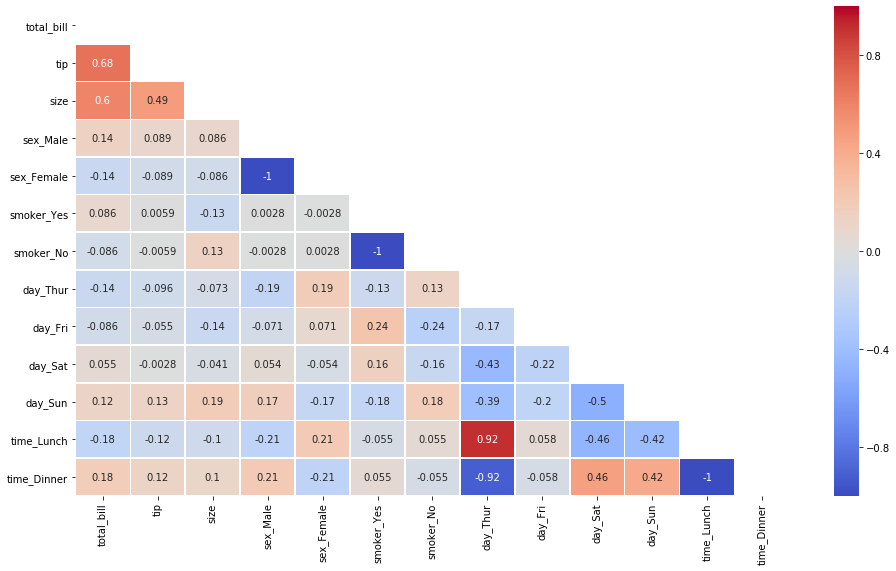

In [22]:
corr = pd.get_dummies(df).corr() # Convert categorical variable into dummy/indicator variables "Male" to 1 "Female" to -1
plt.figure(figsize=(16,9)) # figsize=(Width, Height)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#annot - to show the corr value in the boxes | linewidth - the space between the boxes | cmap - the colors
sb.heatmap(corr, annot=True, linewidth = 0.5, cmap='coolwarm', mask=mask)

## Focus on specific columns

In [34]:
df['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

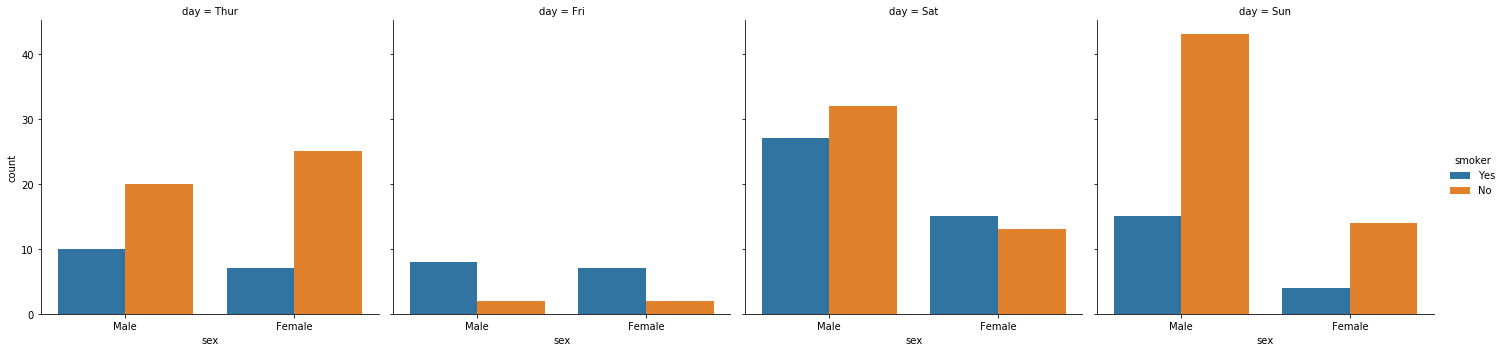

In [33]:
#sb.countplot(x='sex',data=df) # One label
#sb.countplot(x='sex',data=df,hue='smoker') # two labels
sb.factorplot(x='sex',hue='smoker',data=df,col='day',kind='count') # three labels

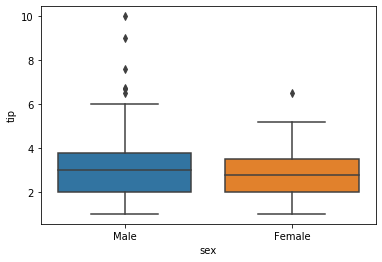

In [35]:
sb.boxplot(x='sex',y='tip',data=df)